# 2022 Running Analysis


In [1]:
from stravadataanalysis.src.repository import data_loader

activities_2022 = data_loader.load_activities("../data/2022/activities")
runs = activities_2022[activities_2022['type'] == 'Run']


## 2022 Highlight

In [2]:
from stravadataanalysis.src.view import data_format

runs_2022 =runs[['id', 'start_date', 'name', 'distance', 'elapsed_time', 'average_speed', 'total_elevation_gain']]\
  .sort_values('distance', ascending=False)
runs_2022['distance_overview'] = runs_2022['distance'].apply(data_format.m_as_km)
runs_2022['elapsed_time_overview'] = runs_2022['elapsed_time'].apply(data_format.seconds_as_hhmmss)
runs_2022['average_speed_overview'] = runs_2022['average_speed'].apply(data_format.mps_as_minpkm)
runs_2022['total_elevation_gain_overview'] = runs_2022['total_elevation_gain'].apply(data_format.m)
display(runs_2022[['name', 'distance_overview', 'elapsed_time_overview', 'average_speed_overview', 'total_elevation_gain_overview', 'start_date']])


,name,distance_overview,elapsed_time_overview,average_speed_overview,total_elevation_gain_overview,start_date
15,Course à pied l'après-midi,21.34km,01:50:38,5:10min/km,121m,2022-03-13T15:21:44Z
54,Foulées du Numérique 2022,19.25km,01:33:47,4:52min/km,13m,2022-09-18T07:48:00Z
22,Henvic / Sentier Côtier à Carantec,18.89km,01:45:04,5:32min/km,263m,2022-04-17T15:00:17Z
62,Course à pied dans l'après-midi,16.66km,01:25:26,5:08min/km,50m,2022-11-05T15:08:22Z
34,Course à pied le matin,15.6km,01:24:23,5:23min/km,21m,2022-06-05T08:04:29Z
18,Course à pied l'après-midi,15.24km,01:22:02,5:22min/km,117m,2022-03-27T15:05:06Z
48,Course à pied dans l'après-midi,15.06km,01:25:30,5:38min/km,79m,2022-08-08T15:50:18Z
47,Course à pied en soirée,15.04km,01:22:59,5:30min/km,117m,2022-08-01T16:12:53Z
28,Course à pied l'après-midi,14.11km,01:11:19,5:03min/km,55m,2022-05-11T15:57:56Z
55,Dernière course le long de la Chézine 😥,13.4km,01:11:22,5:19min/km,115m,2022-09-24T15:58:36Z


In [3]:
from stravadataanalysis.src.view import data_format
from stravadataanalysis.src.domain import highlights
import pandas as pd

highlights_requests = [
    highlights.Highlight('max_distance', 'distance', display_function=data_format.m_as_km),
    highlights.Highlight('max_duration', 'elapsed_time', display_function=lambda x: data_format.seconds_as_hhmmss(int(x))),
    highlights.Highlight('max_elevation_gain', 'total_elevation_gain', display_function=data_format.m),
    highlights.Highlight('earlier_run', 'start_time', ascending_sort_order=True),
    highlights.Highlight('max_average_speed', 'average_speed', data_format.mps_as_minpkm),
    highlights.Highlight('max_top_heartrate', 'max_heartrate', data_format.bpm),
]

columns = ["highlight", "value", "name", "start_date_local", "id"]

highlights_2022 = []
for highlight_request in highlights_requests:
    highlight = highlight_request.transform(runs)
    highlights_2022.append(highlight)

pd.DataFrame(highlights_2022, columns=columns)

,highlight,value,name,start_date_local,id
15,max_distance,21.34km,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
15,max_duration,01:50:38,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
22,max_elevation_gain,263m,Henvic / Sentier Côtier à Carantec,2022-04-17T17:00:17Z,6997761739
40,earlier_run,06:51:23,Course à pied le matin,2022-07-12T06:51:23Z,7454700738
27,max_average_speed,4:45min/km,Course à pied matinale,2022-05-07T10:58:42Z,7101290577
63,max_top_heartrate,204bpm,Côtes à Chantenay,2022-11-10T12:10:37Z,8096506459


# Distance run

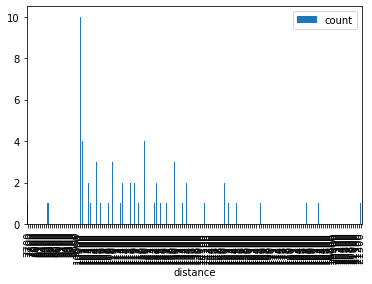

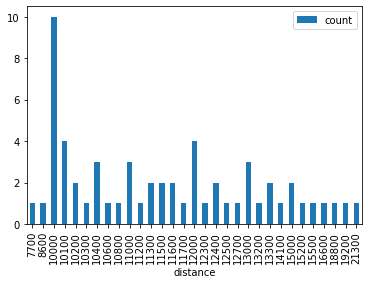

In [4]:
from stravadataanalysis.src.domain.distances import get_distance_distribution
from stravadataanalysis.src.view.plot import plot_distance_distribution

distance_distribution = get_distance_distribution(runs)

plot_distance_distribution(distance_distribution, True)
plot_distance_distribution(distance_distribution, False)

## Segments
Top 10 segments of the year :

,id,count,name
94,20310261,30,passage à côté du stade jusqu'au terrain de te...
44,13276220,17,Retour depuis pont
6,5403095,15,1km Chezine
91,20263817,15,vers aire de jeu du parc de la Chézine
89,20263702,14,Chézine partie sud du circuit principal
16,6899362,13,Montée de l'Avenue des Acacias
84,19642112,13,chez moi
104,22650322,13,Bassin de la Chezine --> 2ème pont
128,27607808,12,Pont Jules César --> Bd du Massacre
8,5472005,12,Dervallieres-Desgrées du lou


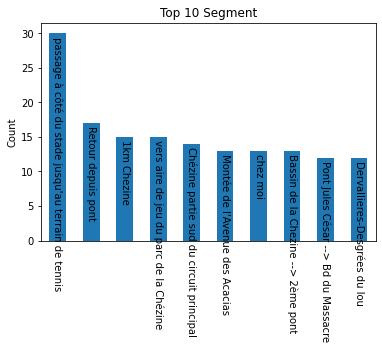

In [5]:
from stravadataanalysis.src.domain import segments
from stravadataanalysis.src.view import plot

top_10_segments = segments.get_top_10_segments(runs)

display(top_10_segments)

plot.plot_top_segments_bar(top_10_segments)


## Split metrics

Evolution of some metrics during my runs :
* speed
* heart rate

> NOTE: Training runs (Strava's workout_type 3) are excluded from the analysis because split runs create split metrics with various interval and the goal is to compare each km.

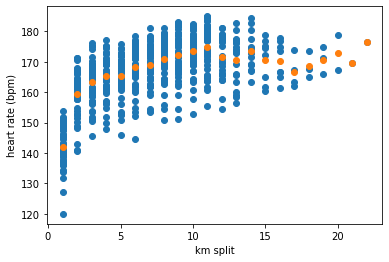

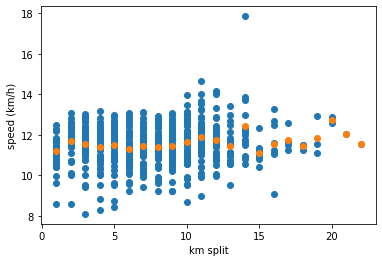

In [6]:
from stravadataanalysis.src.domain import split_metrics
from stravadataanalysis.src.view import plot

runs_activities = runs[runs['workout_type'] != 3].reset_index()
metrics = split_metrics.extract_split_metrics(runs_activities)

plot.plot_split_metric_heartrate(metrics['value'], metrics['means'])
plot.plot_split_metric_speed(metrics['value'], metrics['means'])

In [7]:
display(metrics['value'].sort_values(by='average_speed'))

,split,average_speed,average_heartrate,activity_id,average_speed_kmh
291,3,2.25,151.830700,7204580989,8.100
292,4,2.30,151.864368,7204580989,8.280
293,5,2.34,150.777518,7204580989,8.424
290,2,2.38,142.814904,7204580989,8.568
289,1,2.38,136.428571,7204580989,8.568
...,...,...,...,...,...
201,12,3.89,181.000000,6955311418,14.004
550,11,3.89,183.642857,7937454348,14.004
300,12,3.93,177.482759,7204580989,14.148
173,11,4.07,184.928571,6876311822,14.652
